In [1]:
import pysmile
pysmile.License((
	b"SMILE LICENSE 63cc22d6 32ae9b91 17fc383a "
	b"THIS IS AN ACADEMIC LICENSE AND CAN BE USED "
	b"SOLELY FOR ACADEMIC RESEARCH AND TEACHING, "
	b"AS DEFINED IN THE BAYESFUSION ACADEMIC "
	b"SOFTWARE LICENSING AGREEMENT. "
	b"Serial #: 8plmytdk5kw1rzu918rf7gf92 "
	b"Issued for: melon zhang (z2873887882@gmail.com) "
	b"Academic institution: Southeast University "
	b"Valid until: 2024-11-25 "
	b"Issued by BayesFusion activation server"
	),[
	0x0e,0x51,0x51,0x12,0xab,0x45,0x65,0xd8,0x4b,0x81,0xff,0x4d,0x84,0x2d,0x35,0xb6,
	0xa1,0x90,0x11,0x17,0x18,0x87,0x1d,0xb8,0x85,0x8e,0x50,0xdf,0xb0,0xe0,0xe7,0xc2,
	0x08,0x01,0x5d,0xb4,0xf1,0x56,0xdb,0x5a,0x05,0xe7,0x33,0x11,0xe9,0xc4,0x42,0xd8,
	0x42,0x3f,0xbb,0xa1,0xce,0xcb,0xaf,0xfb,0x89,0x4c,0xf3,0x70,0xbc,0xc6,0x58,0xf2])

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 设置时间戳

In [3]:
timestamp = 2

## 1. 读取DBN网络

In [4]:
net = pysmile.Network()
net.read_file(f"Model/240717 T={timestamp} Primary Intent Recognition Model.xdsl")
print(net.get_all_node_ids())

['UAV1_Task_State', 'UAV2_Task_State', 'UAV3_Task_State', 'UAV4_Task_State', 'UAV_Sensor_State', 'Task_List_State', 'Target_Area_State', 'Trapped_People_State', 'Primary_Intention', 'Secondary_Intention', 'Hotas_Button', 'AOI', 'Flight_Sensor', 'Flight_Fleet_State', 'Flight_Fly_Mode', 'Select_UAV_Num']


## 2. 读取测试集

In [5]:
df = pd.read_csv(f"Dataset\DBN_Test_Data_{timestamp}times.csv")
print(df.head())

   Unnamed: 0  ID  Flight_Fleet_State  Flight_Fly_Mode  Flight_Sensor  \
0           3   5                   0                0              1   
1           4   5                   0                0              1   
2           5   5                   0                0              1   
3           6   5                   0                0              1   
4           7   5                   0                0              1   

   UAV1_Task_State  UAV2_Task_State  UAV3_Task_State  UAV4_Task_State  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   UAV_Sensor_State  ...  UAV4_Task_State_1  UAV_Sensor_State_1  \
0                 1  ...                0.0            

## 3. 定义DBN意图识别的存储变量

In [6]:
# 定义意图识别概率
intent_belief_dict = {
    0: [],
    1: [],
    2: [],
    3: [],
    4: []
}
# 定义实际意图分布
intent_real_dict = {
    0: [],
    1: [],
    2: [],
    3: [],
    4: []
}
# 定义准确率
intent_score = {
    0: 0,
    1: 0,
    2: 0,
    3: 0,
    4: 0
}
# 定义意图识别数量
intent_num = {
    0: 0,
    1: 0,
    2: 0,
    3: 0,
    4: 0
}
# 预测结果和实时结果
predicted_labels = []
true_labels = []

## 4. 模型验证

In [7]:
# 设置时间戳
time_steps = timestamp

# 记录模型推理结果
for index, row in df.iterrows():
    for i in range(time_steps):
        if i == 0:
            # 操作者行为特征
            net.set_temporal_evidence('Hotas_Button', 0, int(row['Hotas_Button']))
            net.set_temporal_evidence('AOI', 0, int(row['AOI']))
            # 直升机本机特征
            net.set_temporal_evidence('Flight_Fleet_State', 0, int(row['Flight_Fleet_State']))
            net.set_temporal_evidence('Flight_Sensor', 0, int(row['Flight_Sensor']))
            net.set_temporal_evidence('Flight_Fly_Mode', 0, int(row['Flight_Fly_Mode']))
            net.set_temporal_evidence('Select_UAV_Num', 0, int(row['Select_UAV_Num']))
            # 态势特征
            net.set_temporal_evidence('UAV1_Task_State', 0, int(row['UAV1_Task_State']))
            net.set_temporal_evidence('UAV2_Task_State', 0, int(row['UAV2_Task_State']))
            net.set_temporal_evidence('UAV3_Task_State', 0, int(row['UAV3_Task_State']))
            net.set_temporal_evidence('UAV4_Task_State', 0, int(row['UAV4_Task_State']))
            net.set_temporal_evidence('UAV_Sensor_State', 0, int(row['UAV_Sensor_State']))
            net.set_temporal_evidence('Task_List_State', 0, int(row['Task_List_State']))
            net.set_temporal_evidence('Target_Area_State', 0, int(row['Target_Area_State']))
            net.set_temporal_evidence('Trapped_People_State', 0, int(row['Trapped_People_State']))
        else:
            # 操作者行为特征
            net.set_temporal_evidence('Hotas_Button', i, int(row[f'Hotas_Button_{i}']))
            net.set_temporal_evidence('AOI', i, int(row[f'AOI_{i}']))
            # 直升机本机特征
            net.set_temporal_evidence('Flight_Fleet_State', i, int(row[f'Flight_Fleet_State_{i}']))
            net.set_temporal_evidence('Flight_Sensor', i, int(row[f'Flight_Sensor_{i}']))
            net.set_temporal_evidence('Flight_Fly_Mode', i, int(row[f'Flight_Fly_Mode_{i}']))
            net.set_temporal_evidence('Select_UAV_Num', i, int(row[f'Select_UAV_Num_{i}']))
            # 态势特征
            net.set_temporal_evidence('UAV1_Task_State', i, int(row[f'UAV1_Task_State_{i}']))
            net.set_temporal_evidence('UAV2_Task_State', i, int(row[f'UAV2_Task_State_{i}']))
            net.set_temporal_evidence('UAV3_Task_State', i, int(row[f'UAV3_Task_State_{i}']))
            net.set_temporal_evidence('UAV4_Task_State', i, int(row[f'UAV4_Task_State_{i}']))
            net.set_temporal_evidence('UAV_Sensor_State', i, int(row[f'UAV_Sensor_State_{i}']))
            net.set_temporal_evidence('Task_List_State', i, int(row[f'Task_List_State_{i}']))
            net.set_temporal_evidence('Target_Area_State', i, int(row[f'Target_Area_State_{i}']))
            net.set_temporal_evidence('Trapped_People_State', i, int(row[f'Trapped_People_State_{i}']))
    
    # 前序意图特征
#     for i in range(time_steps):
#         if i == 0:
#             net.set_temporal_evidence('Secondary_Intention', i, int(row['Secondary_Intention']))
#         else:
#             net.set_temporal_evidence('Secondary_Intention', i, int(row[f'Secondary_Intention_{i}']))
    # net.set_temporal_evidence('Secondary_Intention', 4, int(row['Secondary_Intention_4']))
    # net.set_temporal_evidence('Primary_Intention', 0, int(row['Primary_Intention']))
    
    # 更新动态贝叶斯网络的节点参数
    net.update_beliefs()
    beliefs = net.get_node_value('Primary_Intention')
    # 说明：
    # beliefs代表从[0-时间窗口长度]下所有类意图的概率，格式如下：【意图1_0时刻，意图2_0时刻，意图1_1时刻，意图2_1时刻】
    # net.get_outcome_count('Primary_Intention')获取该节点下的类别数量，'Primary_Intention'包括6类
    
    result = []
    for i in range(0, net.get_outcome_count('Primary_Intention')):
        # 记录时刻1的意图识别结果
        intent_belief_dict[i].append(beliefs[(time_steps-1) * net.get_outcome_count('Primary_Intention') + i])
        # 判断i是否为测试集意图标签，从而记录意图数量
        if i == row[f'Primary_Intention_{time_steps-1}']:
            intent_num[i] += 1
        # 判断预期意图的识别结果是否超过50%，若是则断定为正确记录
        if beliefs[(time_steps-1) * net.get_outcome_count('Primary_Intention') + i] > 0.5 and i == row[f'Primary_Intention_{time_steps-1}']:
            intent_score[i] += 1
        # 保存t=1时刻的各意图识别概率结果
        result.append(beliefs[(time_steps-1) * net.get_outcome_count('Primary_Intention') + i])
        
        # 记录时刻1测试集的实际意图分布
        intent_real_dict[i].append(1 if i == row[f'Primary_Intention_{time_steps-1}'] else 0)
        
    # 保存预测标签和实际标签
    predicted_labels.append(result.index(max(result)))
    true_labels.append(int(row[f'Primary_Intention_{time_steps-1}']))

## 5. 计算任务意图识别准确率

**规则1：设置意图识别概率超过50%，判断正确识别**

In [8]:
total_score = 0
total_num = 0
# 输出正确率
for i in range(5):
    print(f"Intent{i}分类准确率是：", intent_score[i]/intent_num[i], "\t", f"其中Intent_{i}总样本量：", intent_num[i], "预测正确样本量：",
          intent_score[i], "预测错误样本量：", intent_num[i]-intent_score[i])
    total_score += intent_score[i]
    total_num += intent_num[i]

print("总分类准确率是：", total_score/total_num)

Intent0分类准确率是： 0.4394825993224515 	 其中Intent_0总样本量： 3247 预测正确样本量： 1427 预测错误样本量： 1820
Intent1分类准确率是： 0.6163267012205317 	 其中Intent_1总样本量： 23924 预测正确样本量： 14745 预测错误样本量： 9179
Intent2分类准确率是： 0.8495242470771723 	 其中Intent_2总样本量： 82711 预测正确样本量： 70265 预测错误样本量： 12446
Intent3分类准确率是： 0.683197364292438 	 其中Intent_3总样本量： 63740 预测正确样本量： 43547 预测错误样本量： 20193
Intent4分类准确率是： 0.9226299450768128 	 其中Intent_4总样本量： 37689 预测正确样本量： 34773 预测错误样本量： 2916
总分类准确率是： 0.7796896517455315


**规则2：设置意图识别概率最大者，为识别结果，计入正确识别中**

In [9]:
from sklearn.metrics import classification_report
import pandas as pd

# 计算分类报告
report = classification_report(true_labels, predicted_labels, output_dict=True)

# 提取各类别的准确率
accuracy_per_class = {label: report[str(label)]['precision'] for label in report if label.isdigit()}
print("\nAccuracy per class:")
for label, accuracy in accuracy_per_class.items():
    print(f"Intent_{label}: {accuracy:.6f}")

# 如果需要将报告转换为 DataFrame
report_df = pd.DataFrame(report).transpose()
print("\nClassification Report:")
print(report_df)


Accuracy per class:
Intent_0: 0.934512
Intent_1: 0.660486
Intent_2: 0.802145
Intent_3: 0.808249
Intent_4: 0.900947

Classification Report:
              precision    recall  f1-score        support
0              0.934512  0.439483  0.597822    3247.000000
1              0.660486  0.701262  0.680264   23924.000000
2              0.802145  0.886315  0.842132   82711.000000
3              0.808249  0.685300  0.741714   63740.000000
4              0.900947  0.931067  0.915760   37689.000000
accuracy       0.805845  0.805845  0.805845       0.805845
macro avg      0.821268  0.728685  0.755538  211311.000000
weighted avg   0.807604  0.805845  0.802893  211311.000000


## 6. 绘制意图识别结果的混淆矩阵

Confusion Matrix:
[[ 1427     0     0  1820     0]
 [    0 16777  4483  2371   293]
 [   22  3934 73308  4648   799]
 [    2  3703 13588 43681  2766]
 [   76   987    11  1524 35091]]


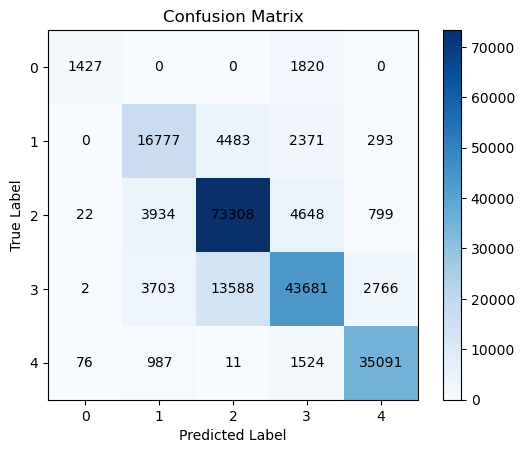

In [10]:
# 混淆矩阵
from sklearn.metrics import confusion_matrix
# 初始化混淆矩阵
num_classes = 5
conf_matrix = np.zeros((num_classes, num_classes), dtype=int)
# 更新混淆矩阵
conf_matrix += confusion_matrix(true_labels, predicted_labels, labels=range(num_classes))
# 打印混淆矩阵
print("Confusion Matrix:")
print(conf_matrix)
# 设置颜色映射
cmap = plt.cm.Blues
# 绘制混淆矩阵图
plt.imshow(conf_matrix, interpolation='nearest', cmap=cmap)
# 添加文字标签
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')
# 添加颜色条
plt.colorbar()
# 添加标题和标签
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# 显示图形
plt.show()

Confusion Matrix (Percentage):
[[4.39482599e+01 0.00000000e+00 0.00000000e+00 5.60517401e+01
  0.00000000e+00]
 [0.00000000e+00 7.01262331e+01 1.87385053e+01 9.91055008e+00
  1.22471159e+00]
 [2.65986386e-02 4.75632020e+00 8.86315000e+01 5.61956693e+00
  9.66014194e-01]
 [3.13774710e-03 5.80953875e+00 2.13178538e+01 6.85299655e+01
  4.33950424e+00]
 [2.01650349e-01 2.61880124e+00 2.91862347e-02 4.04362015e+00
  9.31067420e+01]]


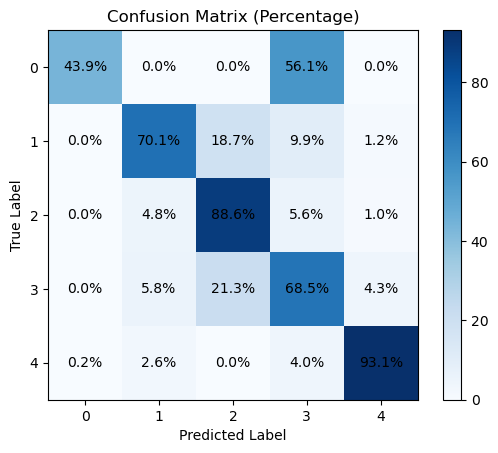

In [11]:
# 绘制百分比混淆矩阵
from sklearn.metrics import confusion_matrix

num_classes = 5
conf_matrix = np.zeros((num_classes, num_classes), dtype=int)
conf_matrix += confusion_matrix(true_labels, predicted_labels, labels=range(num_classes))

# 转换为百分比混淆矩阵
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# 打印混淆矩阵
print("Confusion Matrix (Percentage):")
print(conf_matrix_percentage)

# 绘制百分比混淆矩阵
cmap = plt.cm.Blues
plt.imshow(conf_matrix_percentage, interpolation='nearest', cmap=cmap)

# 添加文字标签
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, f'{conf_matrix_percentage[i, j]:.1f}%', ha='center', va='center', color='black')

# 添加颜色条
plt.colorbar()

# 添加标题和标签
plt.title('Confusion Matrix (Percentage)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# 显示图形
plt.show()

## 7. 绘制意图时序概率转移曲线

<Figure size 1000x600 with 0 Axes>

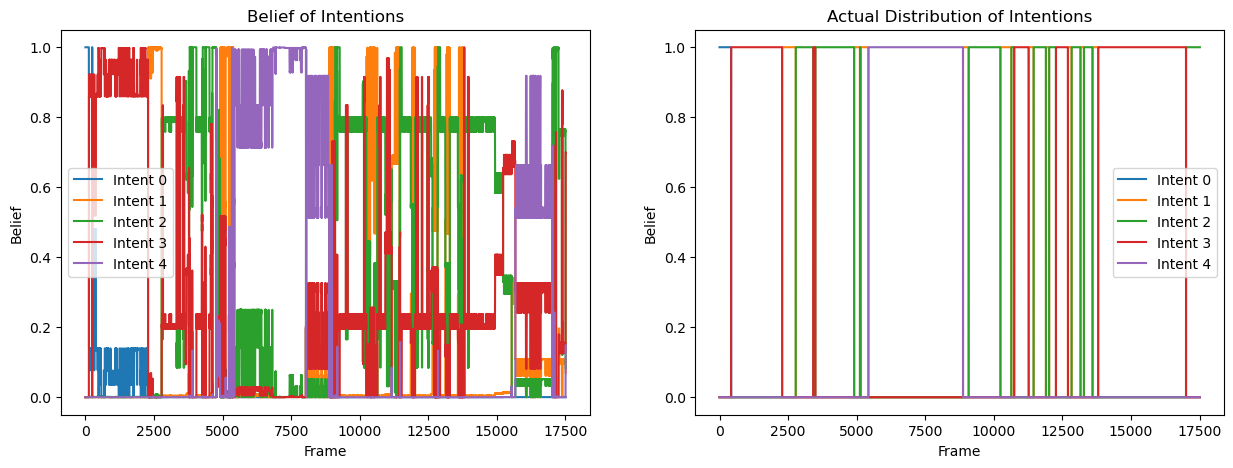

In [12]:
plt.figure(figsize=(10, 6))
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
# 遍历每个数组，绘制折线图
for i in range(6):
    axs[0].plot(intent_belief_dict[i][0:(df['ID'] == 5).sum()], label=f'Intent {i}')
    axs[1].plot(intent_real_dict[i][0:(df['ID'] == 5).sum()], label=f'Intent {i}')

# 添加图例
axs[0].legend()
axs[1].legend()
# 添加标题和标签
axs[0].set_title('Belief of Intentions')
axs[0].set_xlabel('Frame')
axs[0].set_ylabel('Belief')
axs[1].set_title('Actual Distribution of Intentions')
axs[1].set_xlabel('Frame')
axs[1].set_ylabel('Belief')

# 显示图形
plt.show()

In [13]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 计算总体的准确率、精确率、召回率、F1分数
def calculate_metrics_overall_by_sklearn(matrix):
    # 提取真实标签和预测标签
    true_labels = []
    pred_labels = []

    num_classes = matrix.shape[0]

    for i in range(num_classes):
        for j in range(num_classes):
            true_labels.extend([i] * matrix[i, j])
            pred_labels.extend([j] * matrix[i, j])

    # 计算总体的准确率、精确率、召回率和F1分数
    overall_accuracy = accuracy_score(true_labels, pred_labels)
    overall_precision = precision_score(true_labels, pred_labels, average='macro')
    overall_recall = recall_score(true_labels, pred_labels, average='macro')
    overall_f1 = f1_score(true_labels, pred_labels, average='macro')

    return overall_precision, overall_recall, overall_f1, overall_accuracy

real_overall_precision, real_overall_recall, real_overall_f1_score, real_overall_accuracy = calculate_metrics_overall_by_sklearn(conf_matrix)
print("总体精确率（Precision）: ", real_overall_precision)
print("总体召回率（Recall）: ", real_overall_recall)
print("总体F1 分数（F1 Score）: ", real_overall_f1_score)
print("总体准确率（Accuracy）: ", real_overall_accuracy)

总体精确率（Precision）:  0.8212677609415628
总体召回率（Recall）:  0.7286854011019079
总体F1 分数（F1 Score）:  0.7555380816963975
总体准确率（Accuracy）:  0.8058454126855678
